Saving Picture1.png to Picture1.png


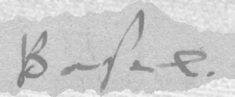

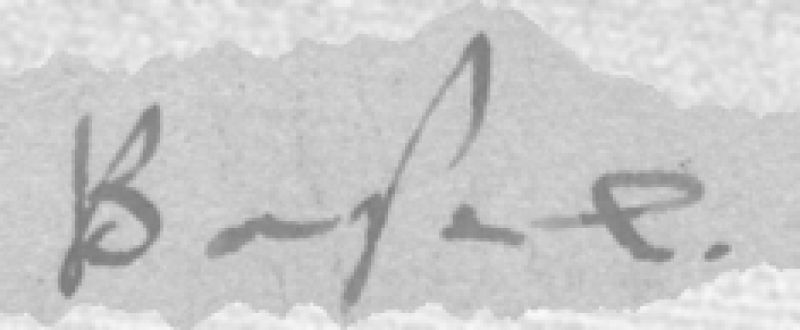

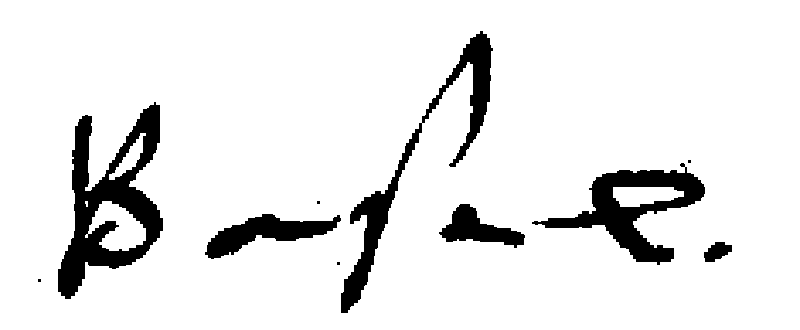

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload the historical document image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image = cv2.imread(file_name)

# Step 1: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

# Step 2: Resize the image
desired_width = 800
desired_height = int(gray_image.shape[0] * (desired_width / gray_image.shape[1]))
resized_image = cv2.resize(gray_image, (desired_width, desired_height), interpolation=cv2.INTER_AREA)
cv2_imshow(resized_image)

# Step 3: Binarization (using Otsu's thresholding)
_, binary_image = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(binary_image)

# Continue with the remaining preprocessing steps as before...

Saving Picture1.png to Picture1 (2).png


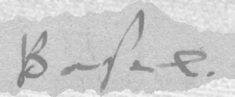

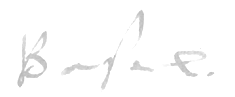

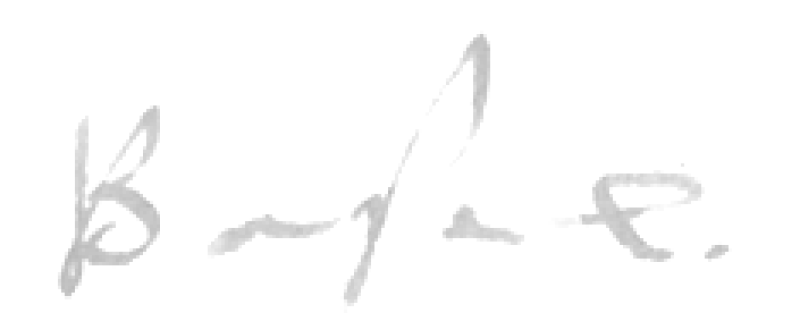

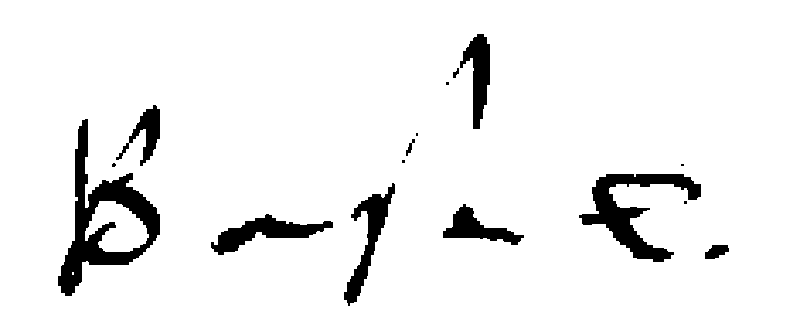

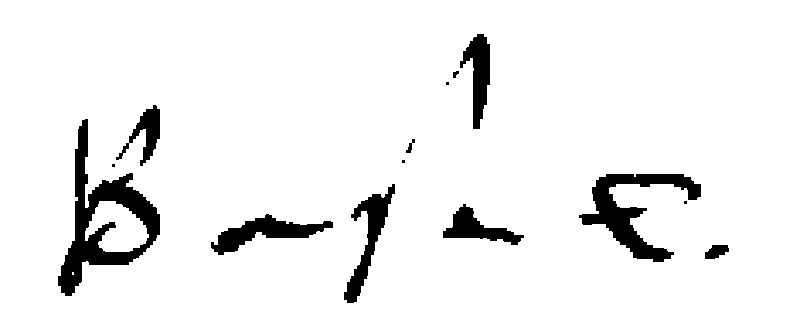

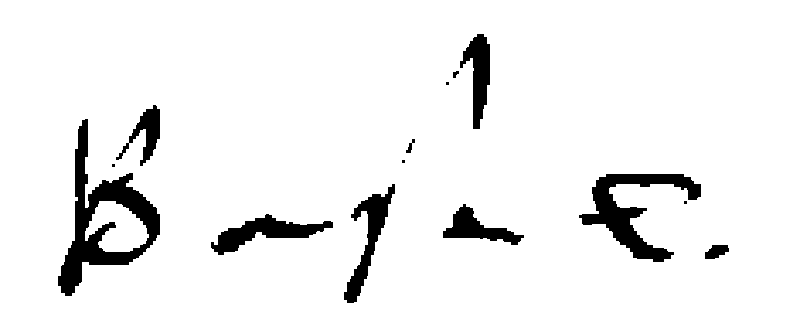

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Upload the historical document image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image = cv2.imread(file_name)

# Step 1: Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

# Step 2: Contrast adjustment
contrast_img = cv2.convertScaleAbs(gray_image, alpha=1.5, beta=0)
cv2_imshow(contrast_img)

# Step 3: Resize the image
desired_width = 800
desired_height = int(contrast_img.shape[0] * (desired_width / contrast_img.shape[1]))
resized_image = cv2.resize(contrast_img, (desired_width, desired_height), interpolation=cv2.INTER_AREA)
cv2_imshow(resized_image)

# Step 4: Binarization (using Otsu's thresholding)
_, binary_image = cv2.threshold(resized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2_imshow(binary_image)

# Step 5: Apply texture solid text (morphological closing)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed_image)

# Step 6: Clean tiny black noise (morphological opening)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened_image = cv2.morphologyEx(closed_image, cv2.MORPH_OPEN, kernel)
cv2_imshow(opened_image)